Automatically created module for IPython interactive environment


C:\ProgramData\Anaconda3\lib\site-packages\sklearn_rvm\em_rvm.py:675: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  warnings.warn("The default value of gamma will change "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn_rvm\em_rvm.py:675: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  warnings.warn("The default value of gamma will change "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn_rvm\em_rvm.py:675: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  warnings.warn("The default value of gamma will change "
C:\ProgramData\Anac

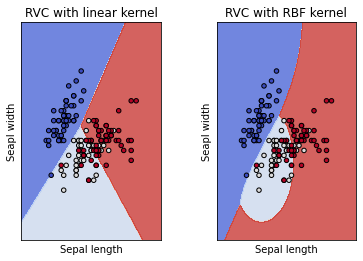

In [6]:
print(__doc__)
!pip install sklearn_rvm
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn_rvm import EMRVC

def make_meshgrid(x,y,h=.02):
    """Create a mesh of points to plot in
    
    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional
    
    Returns
    -------
    xx, yy : ndarray
    """
    
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx,yy

def plot_contours(ax,clf,xx,yy,**params):
    """Plot the decision boundaries for a classifier.
    
    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params:dictionary of params to pass to contourf, optional
    """
    #Z=clf.predict_proba(np.c_[xx.ravel(),yy.ravel()])[:, 1]
    Z=clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z=Z.reshape(xx.shape)
    out = ax.contourf(xx,yy,Z,**params)
    return out

#import some data to play with
iris=datasets.load_iris()
#Take the first two features
X=iris.data[:, :2]
y=iris.target
    
models=(EMRVC(kernel='linear'),
        EMRVC(kernel='rbf'),
        EMRVC(kernel='sigmoid'))
models=(clf.fit(X,y) for clf in models)
    
#title for the plots
titles = ('RVC with linear kernel',
          'RVC with RBF kernel')

# Set-up 2x2 gridfor plotting.
fig,sub=plt.subplots(1,2)

plt.subplots_adjust(wspace=0.4,hspace=0.4)
X0,X1=X[:, 0],X[:,1]
xx,yy = make_meshgrid(X0,X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax,clf,xx,yy,
                 cmap=plt.cm.coolwarm,alpha=0.8)
    ax.scatter(X0,X1,c=y,cmap=plt.cm.coolwarm,s=20,edgecolors='k')
    ax.set_xlim(xx.min(),xx.max())
    ax.set_ylim(yy.min(),yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Seapl width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    
plt.show()